In [1]:
# importing major libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# additional libraries
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('LA4Schools_clean.csv')

In [8]:
pd.set_option('display.max_columns',None)
df.head()

,StudentID,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Kinder_Age,Gender,Disability_Non-disable,Disability_Cognitive,Disability_Physical,Disability_Sensory,Disability_SocialEmotional,NCCD-Funded,NumSibling,SiblingOrder,01.SES,02.SES,NumAbvYear9,NumAbvDiploma,NumProf,Year_02,At_Risk_Numeracy
0,384710734,16,18,25,25,30,32,20,49,4,5,2,2,2,4,2,2,5.493151,1,1,0,0,0,0,0,3,3,104,104,2,1,2,2020,False
1,504699264,8,12,17,19,18,21,40,37,2,1,1,1,2,3,0,2,5.775342,0,1,0,0,0,0,0,2,2,112,112,2,2,2,2018,False
2,332227462,8,12,18,18,23,22,6,30,2,1,1,2,2,1,2,1,5.923288,1,1,0,0,0,0,0,2,2,120,109,2,0,0,2021,False
3,245262793,11,16,25,27,26,31,41,30,2,3,1,2,1,5,2,2,5.695890,1,1,0,0,0,0,0,2,1,95,93,0,0,0,2021,False
4,331173944,9,12,17,21,24,26,26,32,2,4,2,2,2,4,1,1,5.764384,1,1,0,0,0,0,0,1,1,98,98,2,0,0,2021,False


In [15]:
# understanding student population
# dividing data into subgroups
df.columns
student_population = ['StudentID','Kinder_Age', 'Gender',
       'Disability_Non-disable', 'Disability_Cognitive', 'Disability_Physical',
       'Disability_Sensory', 'Disability_SocialEmotional', 'NCCD-Funded',
       'NumSibling', 'SiblingOrder','At_Risk_Numeracy']
student_pop = df.loc[:,student_population]
student_pop.to_csv('student_population.csv')
student_pop.head()

,StudentID,Kinder_Age,Gender,Disability_Non-disable,Disability_Cognitive,Disability_Physical,Disability_Sensory,Disability_SocialEmotional,NCCD-Funded,NumSibling,SiblingOrder,At_Risk_Numeracy
0,384710734,5.493151,1,1,0,0,0,0,0,3,3,False
1,504699264,5.775342,0,1,0,0,0,0,0,2,2,False
2,332227462,5.923288,1,1,0,0,0,0,0,2,2,False
3,245262793,5.695890,1,1,0,0,0,0,0,2,1,False
4,331173944,5.764384,1,1,0,0,0,0,0,1,1,False


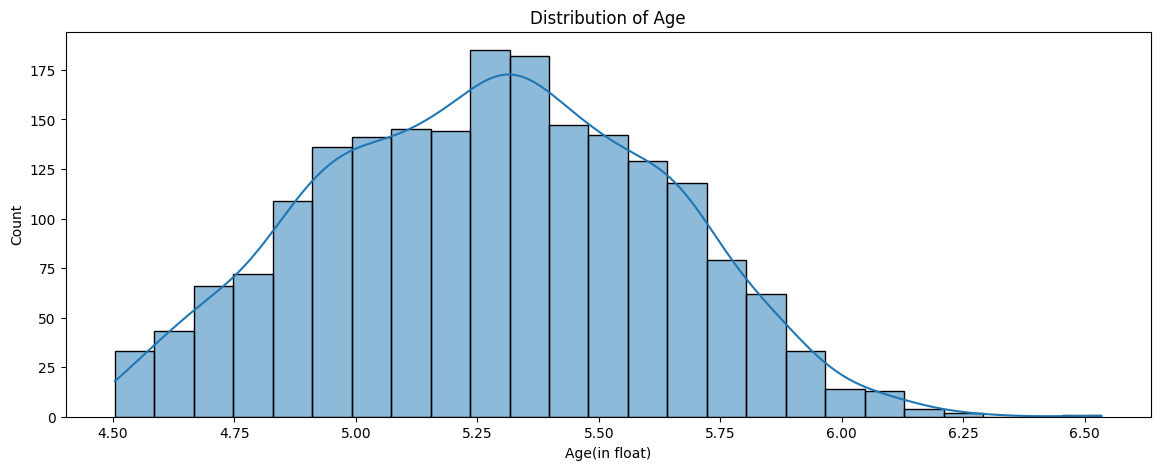

In [19]:
# distribution of Age
plt.figure(figsize=(14,5))
sns.histplot(data=student_pop,x='Kinder_Age',kde=True)
plt.xlabel('Age(in float)')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

- Graph is roughly Bell Shaped.
- Graph is peaking around 5.2 and 5.3.
- Age Range is 4.5 to 5.50, which is normal kindergarten age.
- Slight right skew suggest some students started kindergarten late.


<Figure size 1400x500 with 0 Axes>

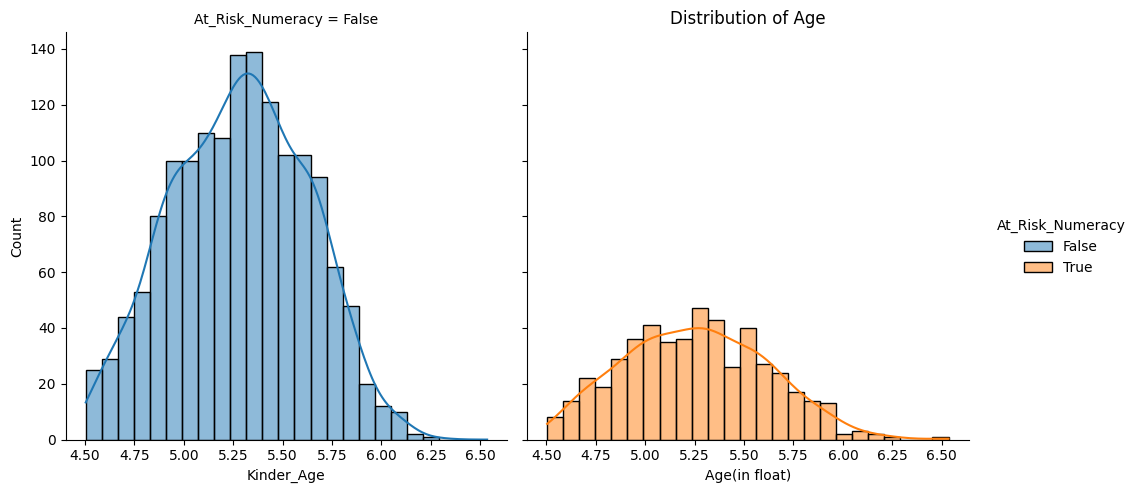

In [21]:
plt.figure(figsize=(14,5))
sns.displot(data=student_pop,x='Kinder_Age',kde=True,col='At_Risk_Numeracy',hue='At_Risk_Numeracy')
plt.xlabel('Age(in float)')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

- The histogram visually suggests younger students might be more at risk

In [37]:
student_pop.Kinder_Age[student_pop.At_Risk_Numeracy==True].var()
student_pop.Kinder_Age[student_pop.At_Risk_Numeracy==False].var()
# both have almost similar variance
at_risk =student_pop.Kinder_Age[student_pop.At_Risk_Numeracy==True]
not_at_risk = student_pop.Kinder_Age[student_pop.At_Risk_Numeracy==False]

from scipy.stats import ttest_ind
T_stats, p_value = ttest_ind(at_risk,not_at_risk)
print('P-Value\t\t',p_value)
print('T-Statistics\t',T_stats)

# There is no statistically significant difference in average age between students who are at risk and not at risk in numeracy.
print('-'*100)
print(f'Since {p_value} is greater than 0.05, we fail to reject the null hypothesis')
print('There is no statistically significant difference in average age between students who are at risk and not at risk in numeracy.')

P-Value		 0.12052258810727359
T-Statistics	 -1.5532466807443983
----------------------------------------------------------------------------------------------------
Since 0.12052258810727359 is greater than 0.05, we fail to reject the null hypothesis
There is no statistically significant difference in average age between students who are at risk and not at risk in numeracy.


<Figure size 1400x500 with 0 Axes>

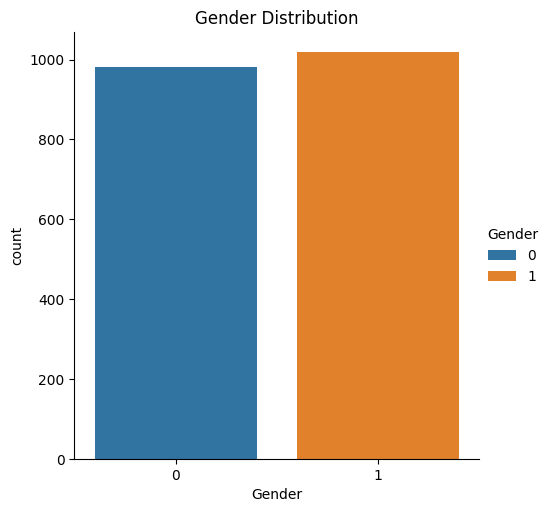

In [48]:
# gender distribution
plt.figure(figsize=(14,5))
sns.catplot(data=student_pop, x='Gender',hue='Gender',kind='count')
plt.title('Gender Distribution')
plt.show()

- Nearly balanced distribution of gender, with roughly equal numbers of students represented across both categories.
- Reduces the chance of Gender Bias in Model